In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

resp = pd.read_csv('../project/data/resp.csv', index_col=0)

In [94]:
features = resp[['exercise', 'food_amount', 'maj_ind']]
response = resp.income_weekly

X_train, X_test, y_train, y_test = train_test_split(features, response, random_state=1)

## Decision Tree

In [95]:
resp['prediction'] = resp.income_weekly.mean()
resp.head()

,bmi,primary_eating,secondary_eating,exercise,fast_food,food_amount,stores,maj_ind,cat_occ,income_lvl,income_weekly,prediction
7,27.500000,30.0,5.0,2.0,1.0,3.0,1.0,5,3,3.0,144.90,942.127955
34,30.600000,85.0,0.0,2.0,1.0,3.0,2.0,13,1,3.0,1038.46,942.127955
36,18.299999,145.0,0.0,2.0,1.0,3.0,1.0,10,1,3.0,884.61,942.127955
37,26.500000,60.0,5.0,2.0,2.0,3.0,1.0,12,2,1.0,415.00,942.127955
38,24.200001,15.0,0.0,1.0,1.0,3.0,1.0,8,1,3.0,576.92,942.127955


In [96]:
np.sqrt(metrics.mean_squared_error(resp.income_weekly, resp.prediction))

597.43793487654943

In [89]:
def feature_split(primary_eating):
    lower_earnings = resp[resp.primary_eating < primary_eating].income_weekly.mean()
    higher_earnings = resp[resp.primary_eating >= primary_eating].income_weekly.mean()
    resp['prediction'] = np.where(resp.primary_eating < primary_eating, lower_earnings, higher_earnings)
    return np.sqrt(metrics.mean_squared_error(resp.income_weekly, resp.prediction))

print 'RMSE:', feature_split (60)
resp.head()

RMSE: 596.381918872


,bmi,primary_eating,secondary_eating,exercise,fast_food,food_amount,stores,maj_ind,cat_occ,income_lvl,income_weekly,prediction
7,27.500000,30.0,5.0,2.0,1.0,3.0,1.0,5,3,3.0,144.90,908.764808
34,30.600000,85.0,0.0,2.0,1.0,3.0,2.0,13,1,3.0,1038.46,979.914944
36,18.299999,145.0,0.0,2.0,1.0,3.0,1.0,10,1,3.0,884.61,979.914944
37,26.500000,60.0,5.0,2.0,2.0,3.0,1.0,12,2,1.0,415.00,979.914944
38,24.200001,15.0,0.0,1.0,1.0,3.0,1.0,8,1,3.0,576.92,908.764808


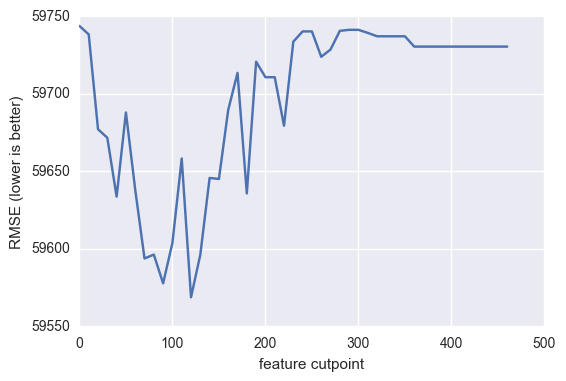

In [183]:
feature_range = range(int(resp.primary_eating.min()), int(resp.primary_eating.max()), 10)
RMSE = [feature_split(primary_eating) for primary_eating in feature_range]

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

plt.plot(feature_range, RMSE)
plt.xlabel('feature cutpoint')
plt.ylabel('RMSE (lower is better)')

In [184]:
print 'RMSE:', feature_split (120)

RMSE: 59568.7577004


In [185]:
feature_cols = ['food_amount', 'exercise', 'cat_occ', 'maj_ind']
X = resp[feature_cols]
y = resp.income_weekly


In [186]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)

from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=15, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

56407.569036996363

In [187]:
max_depth_range = range(1, 8)

RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=15, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

In [188]:
RMSE_scores[0:7]

[55213.087541645349,
 54578.372810571454,
 54723.072021287204,
 55154.260720995517,
 55881.274893935224,
 55552.417933867895,
 55656.073460489824]

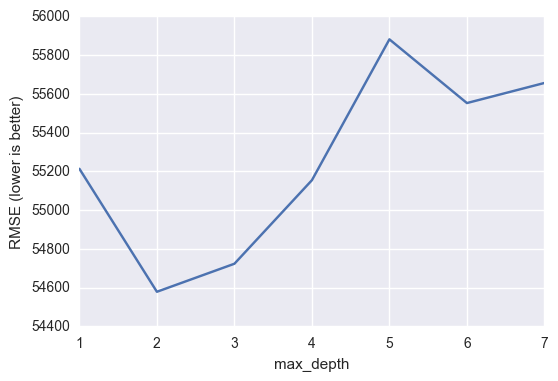

In [189]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [46]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
treereg.fit(X, y)

NameError: name 'X' is not defined

In [191]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,food_amount,0.030491
1,exercise,0.102579
2,cat_occ,0.813926
3,maj_ind,0.053005


In [120]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_atus_eh.dot', feature_names=feature_cols)


## Decision Tree 2

In [43]:
X_2 = resp.drop(['income_weekly', 'income_lvl', 'prediction'], axis=1)
y_2 = resp.income_weekly

from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
scores = cross_val_score(treereg, X_2, y_2, cv=5, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

70043.051036394289

In [44]:
treereg.fit(X_2, y_2)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [45]:
pd.DataFrame({'feature':X_2, 'importance':treereg.feature_importances_})

ValueError: cannot copy sequence with size 10 to array axis with dimension 1158

In [32]:

# from sklearn.tree import export_graphviz
# export_graphviz(treereg, out_file='tree2_atus_eh.dot', feature_names=X_2)

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

## KNN

In [121]:
resp_knn = resp[['bmi', 'exercise', 'food_amount', 'cat_occ','income_lvl']]

X, y = resp_knn.drop('income_lvl', axis = 1), resp_knn['income_lvl']
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X, y)

knn.score(X, y)

0.79274611398963735

In [122]:
resp_knn.describe()

,bmi,exercise,food_amount,cat_occ,income_lvl
count,1158.000000,1158.00000,1158.000000,1158.000000,1158.000000
mean,27.601093,1.66494,2.915371,2.370466,4.288428
std,5.867382,0.48128,0.371530,1.692443,1.385087
min,15.800000,0.00000,0.000000,1.000000,0.000000
25%,23.700001,1.00000,3.000000,1.000000,5.000000
50%,26.650001,2.00000,3.000000,2.000000,5.000000
75%,30.400000,2.00000,3.000000,3.000000,5.000000
max,58.400002,2.00000,3.000000,6.000000,5.000000


In [123]:
# knn.predict(np.array([25,2,2,1]).reshape(1, 4))  

X_new = [[27,2,3,12], [30, 1, 2, 14]]
knn.predict(X_new)

array([ 5.,  5.])

In [124]:
knn = KNeighborsClassifier(n_neighbors=3)
X_subset = X[['exercise', 'food_amount', 'cat_occ']]
knn.fit(X_subset, y)
knn.score(X_subset, y)

0.67271157167530227

In [125]:
from sklearn.preprocessing import StandardScaler
s_knn = StandardScaler()

X_scaled = s_knn.fit_transform(X[['bmi', 'exercise', 'food_amount', 'cat_occ']].as_matrix())

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
knn.score(X_scaled, y)

0.78497409326424872

In [126]:
cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy').mean()

0.6908407157270815

In [127]:
X_new = [[27,2,3,12], [30, 1, 2, 14]]
knn.predict(X_new)

array([ 5.,  5.])

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

resp_log = resp[['bmi', 'exercise', 'food_amount', 'cat_occ', 'income_lvl']]

X, y = resp_log.drop('income_lvl', axis = 1), resp_log['income_lvl']

s_log = StandardScaler()

X_scaled = s_log.fit_transform(X[['bmi', 'exercise', 'food_amount', 'cat_occ']].as_matrix())


logreg = LogisticRegression()
#cross_val_score(logreg, X_scaled, y, cv=5, scoring='accuracy').mean()
scores = cross_val_score(logreg, X_scaled, y, cv=5, scoring='accuracy')
scores

NameError: name 'StandardScaler' is not defined

In [178]:
preds = logreg.predict(X_scaled)
print metrics.confusion_matrix(y, preds)

NotFittedError: This LogisticRegression instance is not fitted yet

## ROC-AUC

In [129]:
# X_sca_bi = s_log.fit_transform(X[['bmi']])

# cross_val_score(logreg, X_sca_bi, y, cv=5, scoring='roc_auc').mean()

In [84]:
resp_roc = resp

resp_roc.income_lvl.replace([1, 2, 3, 4, 5], [0, 0, 0, 0, 1], inplace=True)

resp.income_lvl.value_counts()

0.0    1158
Name: income_lvl, dtype: int64

In [75]:
X = resp_roc[['cat_occ']]
y = resp_roc.income_lvl

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
logreg.score(X_test, y_test)

0.76551724137931032

In [80]:
# preds = logreg.predict(X_test)
# from sklearn import metrics
# print metrics.accuracy_score(y_test, preds)

In [81]:
1-y_test.mean()


0.23448275862068968

In [73]:
print metrics.confusion_matrix(y_test, preds)

[[  0  68]
 [  0 222]]


(array([ 136.,   46.,    0.,   58.,    0.,    2.,    0.,   18.,    0.,   30.]),
 array([ 0.10036688,  0.11059949,  0.12083209,  0.1310647 ,  0.14129731,
         0.15152992,  0.16176253,  0.17199514,  0.18222774,  0.19246035,
         0.20269296]),
 <a list of 10 Patch objects>)

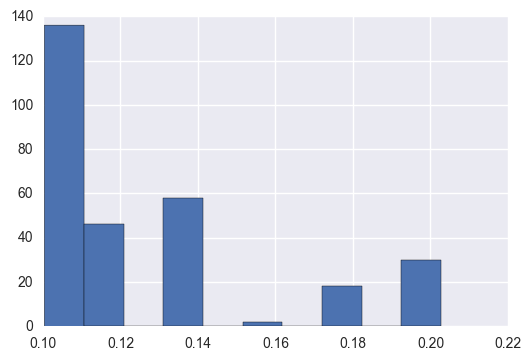

In [64]:
probs = logreg.predict_proba(X_test)[:, 1]
plt.hist(probs)

In [65]:
print metrics.accuracy_score(y_test, preds)
print 45 / float(34 + 45)
print 2340 / float(2340 + 81)

0.765517241379
0.569620253165
0.966542750929


In [66]:
print metrics.roc_auc_score(y_test, probs)

ValueError: multiclass format is not supported

## Clustering

In [152]:
resp_cluster = resp[['bmi', 'exercise', 'food_amount', 'cat_occ', 'income_lvl']]

X = resp_cluster.drop('income_lvl', axis=1)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [153]:
resp_cluster['cluster'] = km.labels_
resp_cluster.sort('cluster')

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,bmi,exercise,food_amount,cat_occ,income_lvl,cluster
7,27.500000,2.0,3.0,3,5.0,0
4646,25.100000,2.0,3.0,1,5.0,0
4670,27.299999,2.0,3.0,2,5.0,0
4710,25.400000,2.0,3.0,1,5.0,0
4719,28.700001,2.0,3.0,3,5.0,0
4736,28.299999,1.0,3.0,1,5.0,0
4760,25.799999,2.0,3.0,1,5.0,0
4771,27.400000,2.0,2.0,2,5.0,0
4642,28.200001,1.0,3.0,3,5.0,0
4815,28.100000,2.0,3.0,3,3.0,0


In [154]:
km.cluster_centers_

array([[ 26.72388032,   1.7010989 ,   2.87252747,   2.42197802],
       [ 37.76310702,   1.53398058,   2.96116505,   2.51456311],
       [ 21.98056335,   1.72112676,   2.95492958,   2.04225352],
       [ 49.95909105,   1.45454545,   2.81818182,   1.90909091],
       [ 31.43901341,   1.58295964,   2.92825112,   2.76681614]])

In [155]:
resp_cluster.groupby('cluster').mean()

,bmi,exercise,food_amount,cat_occ,income_lvl
cluster,,,,,
0,26.718565,1.699561,2.872807,2.423246,4.210526
1,37.763107,1.533981,2.961165,2.514563,4.252427
2,21.974011,1.723164,2.954802,2.039548,4.406780
3,49.959091,1.454545,2.818182,1.909091,4.090909
4,31.439013,1.582960,2.928251,2.766816,4.295964


In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [157]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [158]:
resp_cluster['cluster'] = km.labels_
resp_cluster.sort('cluster').head()

/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/FrancescaSchott/anaconda/envs/testenv/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,bmi,exercise,food_amount,cat_occ,income_lvl,cluster
7,27.5,2.0,3.0,3,5.0,0
4102,24.9,2.0,3.0,1,5.0,0
4105,19.0,2.0,3.0,3,5.0,0
7578,27.4,2.0,3.0,3,5.0,0
7576,23.9,2.0,3.0,3,5.0,0


In [159]:
resp_cluster.groupby('cluster').mean()

,bmi,exercise,food_amount,cat_occ,income_lvl
cluster,,,,,
0,25.362427,2.000000,3.000000,1.588339,4.517668
1,26.421391,0.991111,3.000000,1.888889,4.142222
2,28.230274,1.576923,3.000000,5.615385,4.148352
3,27.591042,1.469697,1.560606,2.772727,2.984848
4,39.522689,1.588235,2.974790,1.815126,4.411765


In [167]:
plt.scatter(X_scaled.bmi, X_scaled.exercise, X_scaled.food_amount, X_scaled.cat_occ, c=colors[list(resp_cluster.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.bmi, centers.exercise, centers.food_amount, centers.cat_occ, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

AttributeError: 'numpy.ndarray' object has no attribute 'bmi'